In [8]:
import tensorflow as tf
print(tf.__version__)

# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

# Save the input and target variables

#print(diabetes_dataset.keys())
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

# Normalise the target data (this will make clearer training curves)

targets = (targets - targets.mean(axis = 0)) / targets.std()

# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

2.17.0
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables h

D:\Anaconda1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,097 (328.50 KB)

 Trainable params: 84,097 (328.50 KB)

 Non-trainable params: 0 (0.00 B)

None
2/2 - 0s - 9ms/step - loss: 0.4973 - mae: 0.4973


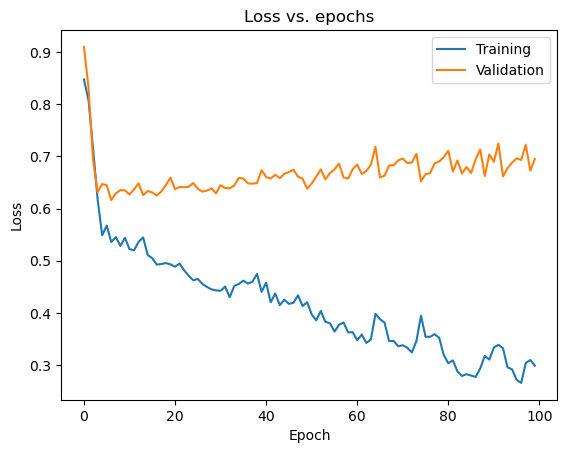

In [9]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


def get_model():
    model = Sequential([
        Dense(128, activation = 'relu', input_shape = (train_data.shape[1],)),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(1)
    ])
    return model
model = get_model()

# Print the model summary

print(model.summary())
# Compile the model

model.compile(optimizer = 'adam', loss = 'mae', metrics = ['mae'])

# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs = 100, validation_split=0.15, batch_size = 64, verbose = False)

# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose = 2)

import matplotlib.pyplot as plt
%matplotlib inline

# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

D:\Anaconda1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 - 0s - 10ms/step - loss: 0.4919 - mae: 0.4856


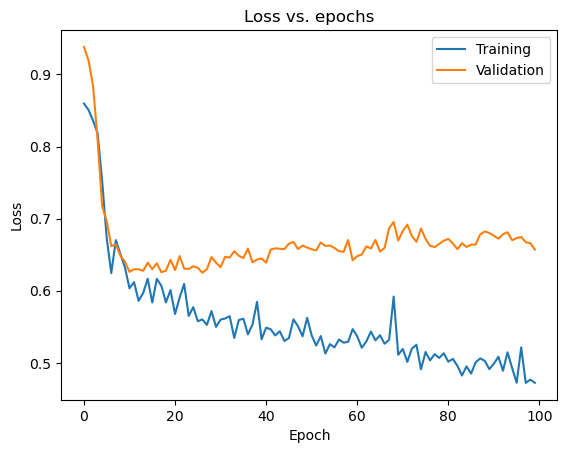

In [11]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5, 0.3)
# Compile the model

model.compile(optimizer = 'adam', loss = 'mae', metrics = ['mae'])
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs = 100, validation_split=0.15, batch_size = 64, verbose = False)
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose = 2)

# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [12]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs = None):
        print('Starting training')
        
    def on_epoch_begin(self, epoch, logs = None):
        print('Starting epoch', epoch)
        
    def on_train_batch_begin(self, batch, logs = None):
        print('Training: Starting batch', batch)
        
    def on_train_batch_end(self, batch, logs = None):
        print('Training: Finished batch', batch)
        
    def on_epoch_end(self, epoch, logs = None):
        print('Finished epoch', epoch)
        
    def on_train_end(self, logs = None):
        print('Finished training')
        
class TestingCallback(Callback):
    
    def on_test_begin(self, logs = None):
        print('Starting testing')
        
   
    def on_test_batch_begin(self, batch, logs = None):
        print('Testing: Starting batch', batch)
        
    def on_test_batch_end(self, batch, logs = None):
        print('Testing: Finished batch', batch)

        
    def on_test_end(self, logs = None):
        print('Finished testing')
        
class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs = None):
        print('Starting prediction')
        
   
    def on_predict_batch_begin(self, batch, logs = None):
        print('Prediction: Starting batch', batch)
        
    def on_predict_batch_end(self, batch, logs = None):
        print('Prediction: Finished batch', batch)

        
    def on_predict_end(self, logs = None):
        print('Finished prediction')
# Re-build the model

model = get_regularised_model(1e-5, 0.3)
# Compile the model

model.compile(optimizer = 'adam', loss = 'mae')
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs = 3, batch_size = 128, verbose = False, callbacks = [TrainingCallback()])
# Evaluate the model

model.evaluate(test_data, test_targets, verbose = 2, callbacks = [TestingCallback()])
# Make predictions with the model
model.predict(test_data, verbose = False, callbacks = [PredictionCallback()])


Starting training
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
Finished training
Starting testing
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing
2/2 - 0s - 96ms/step - loss: 0.7253
Starting prediction
Prediction: Starting

array([[-0.11978386],
       [-0.09719507],
       [-0.12528956],
       [-0.07436784],
       [-0.09071547],
       [-0.10940373],
       [-0.1571699 ],
       [-0.15402196],
       [-0.13043302],
       [-0.11835895],
       [-0.06885203],
       [-0.1651781 ],
       [-0.18698768],
       [-0.19921942],
       [-0.18800662],
       [-0.18226571],
       [-0.05810012],
       [-0.19794269],
       [-0.10485518],
       [-0.12053451],
       [-0.09407809],
       [-0.11755927],
       [-0.15300454],
       [-0.07974447],
       [-0.09391873],
       [-0.13807009],
       [-0.14543858],
       [-0.07487383],
       [-0.08108057],
       [-0.17796315],
       [-0.20104848],
       [-0.10872446],
       [-0.11702369],
       [-0.13967194],
       [-0.20637272],
       [-0.19532254],
       [-0.05652204],
       [-0.07189269],
       [-0.12374604],
       [-0.16952313],
       [-0.10696466],
       [-0.10640374],
       [-0.20448951],
       [-0.11692934],
       [-0.08494262]], dtype=flo

2/2 - 0s - 8ms/step - loss: 0.5400
2/2 - 0s - 8ms/step - loss: 0.5509


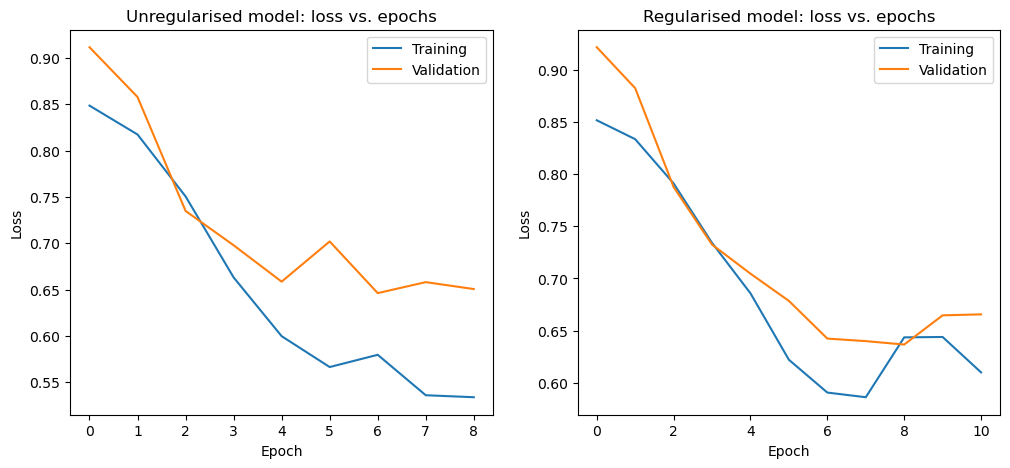

In [13]:
# Re-train the unregularised model

unregularized_model = get_model()
unregularized_model.compile(optimizer = 'adam', loss = 'mae')
unreg_history = unregularized_model.fit(train_data, train_targets, epochs = 100, validation_split = 0.15, batch_size = 64, verbose = False, 
                                        callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2)])
# Evaluate the model on the test set

unregularized_model.evaluate(test_data, test_targets, verbose = 2)
# Re-train the regularised model

regularized_model = get_regularised_model(1e-8, 0.2)
regularized_model.compile(optimizer = 'adam', loss = 'mae')
reg_history = regularized_model.fit(train_data, train_targets, epochs = 100, 
                                    validation_split = 0.15, batch_size = 64, verbose = False, 
                                        callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2)])
# Evaluate the model on the test set

regularized_model.evaluate(test_data, test_targets, verbose = 2)

# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()